In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# 한글 폰트 설정을 위한 코드 (이미 설정하셨다면 생략)
plt.rc('font', family='Malgun Gothic') # Windows
# plt.rc('font', family='AppleGothic') # Mac
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

In [2]:
df = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/3차_전처리.csv')
df.head()

,아이디,국가별,성별,연령별,문1. 주요 방한 목적,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1순위,문3-1. 고려한 관광활동_1순위,문3-2. 고려한 관광인프라_1순위,"문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)",...,주요 체재 지역,총 국내 지출경비,총 식비_비율,총 국내 교통비_비율,총 체험/활동비_비율,총 뷰티/의료비_비율,총 여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율
0,6.0,3.0,2.0,2.0,1,4.0,2.0,1.0,6.0,40.49,...,서울,1093.20,0.324863,0.120051,0.021186,0.049433,0.000000,0.112999,0.353110,0.018359
1,12.0,5.0,2.0,4.0,1,1.0,8.0,5.0,5.0,228.02,...,서울,1140.09,0.168539,0.033708,0.011236,0.000000,0.000000,0.337079,0.449438,0.000000
2,14.0,8.0,2.0,3.0,1,1.0,4.0,12.0,1.0,204.30,...,서울,1430.10,0.158730,0.088889,0.022222,0.000000,0.000000,0.666667,0.063492,0.000000
3,19.0,8.0,1.0,5.0,1,1.0,1.0,5.0,4.0,219.91,...,서울,1759.25,0.129032,0.419355,0.000000,0.000000,0.000000,0.258065,0.193548,0.000000
4,20.0,3.0,1.0,2.0,1,1.0,7.0,7.0,10.0,167.08,...,서울,1336.60,0.243902,0.170732,0.000000,0.000000,0.146341,0.195122,0.243902,0.000000


In [3]:
df.columns

Index(['아이디', '국가별', '성별', '연령별', '문1. 주요 방한 목적', '한국 방문횟수(카테고리)',
       '문1-1. 한국여행 관심 계기_1순위', '문3-1. 고려한 관광활동_1순위', '문3-2. 고려한 관광인프라_1순위',
       '문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)',
       '문9-3. 총 체재기간_61일 이상 결측', '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '주요 체재 지역',
       '총 국내 지출경비', '총 식비_비율', '총 국내 교통비_비율', '총 체험/활동비_비율', '총 뷰티/의료비_비율',
       '총 여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율', '기타 비용_비율'],
      dtype='object')

In [5]:
tmp = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/만족도조사.csv')

C:\Users\sopi0\AppData\Local\Temp\ipykernel_17848\2054063380.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/만족도조사.csv')


# 근데 1~3순위인 변수들 2,3순위는 그냥 버려? 다른 방법 없나

In [13]:
tmp = tmp[['아이디', '문1-1. 한국여행 관심 계기_2순위', '문1-1. 한국여행 관심 계기_3순위']]

In [17]:
tmp1 = pd.merge(left=df, right=tmp, how='inner', on='아이디')
tmp1.shape

(9652, 26)

In [18]:
tmp1['문1-1. 한국여행 관심 계기_2순위'].isna().sum()

2293

In [19]:
tmp1['문1-1. 한국여행 관심 계기_3순위'].isna().sum()

3923

결측치 아주 많은 것도 아님

제미나이한테 물어보니 원-핫 인코딩 혹은 가중치 부여하라는데 결론이 둘다 범주 개수만큼 변수를 늘려야한댔음 우리 순위 변수가 3개라 다 그 방법으로 하면 변수 3개에서 39개?로 늘어남 개오바

우리처럼 비지도 클러스터링 쓸 생각이면 모델 성능에 아주 안 좋다고 말했더니

**추천받은 새로운 방법!**

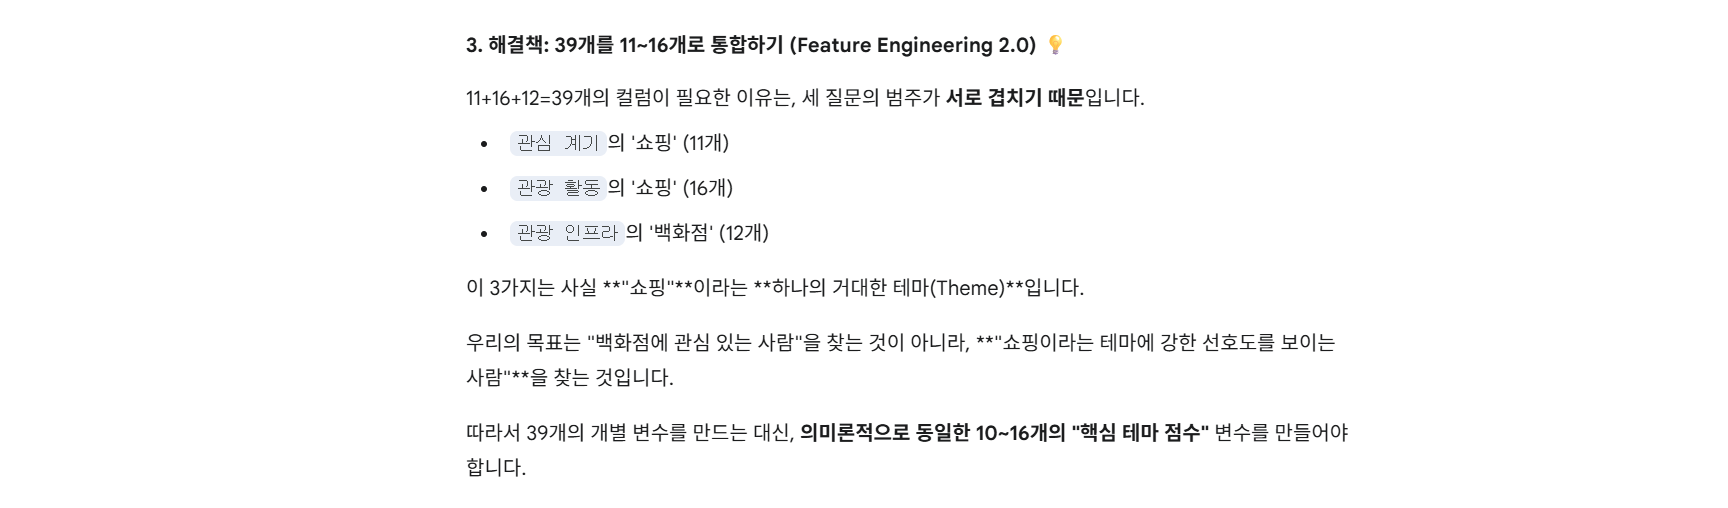

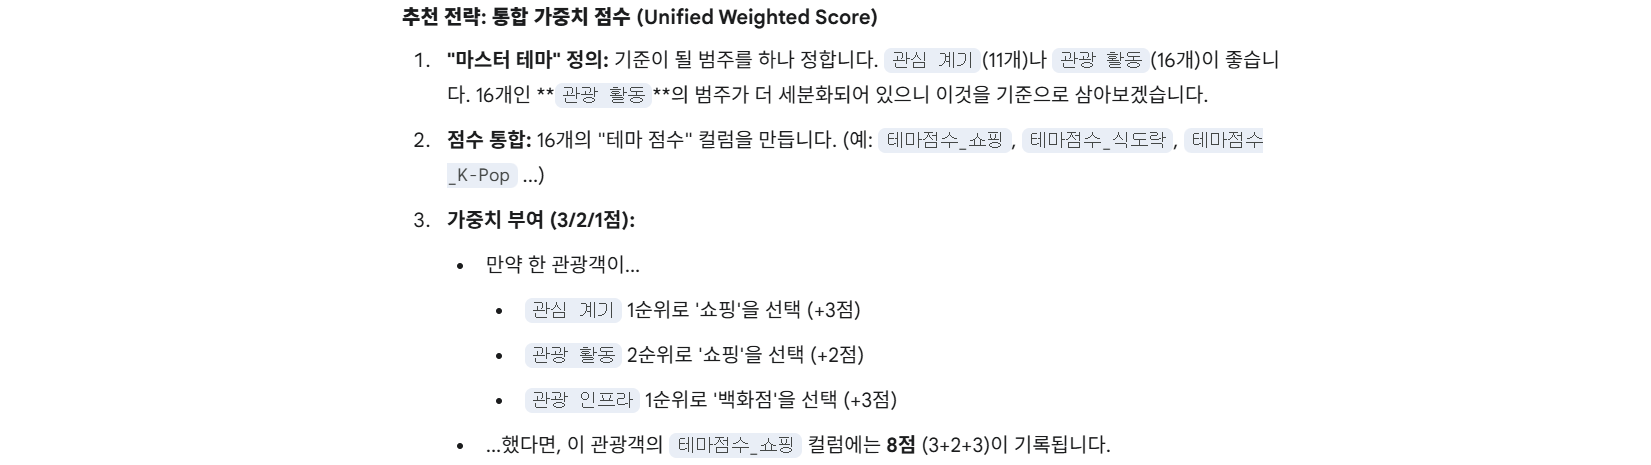

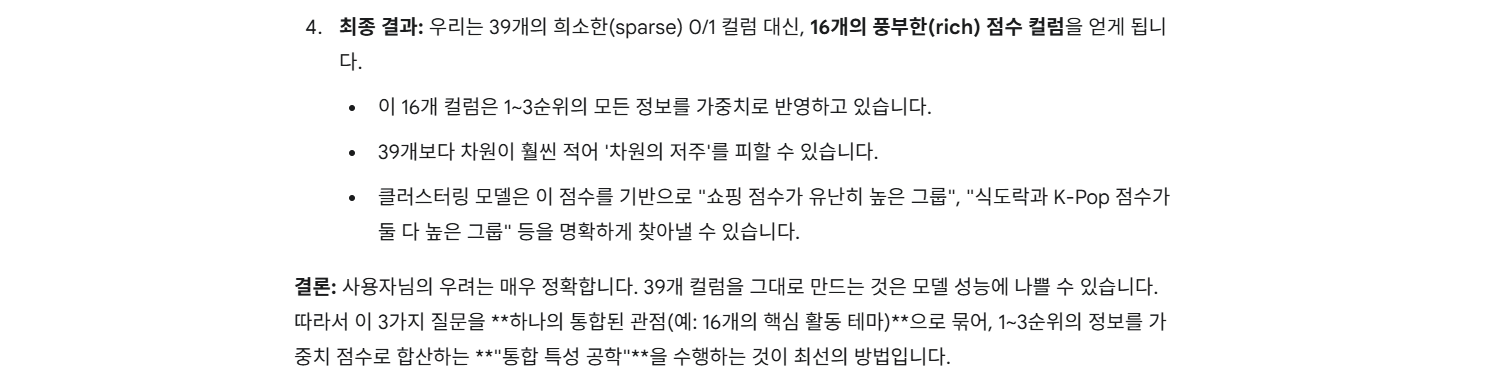

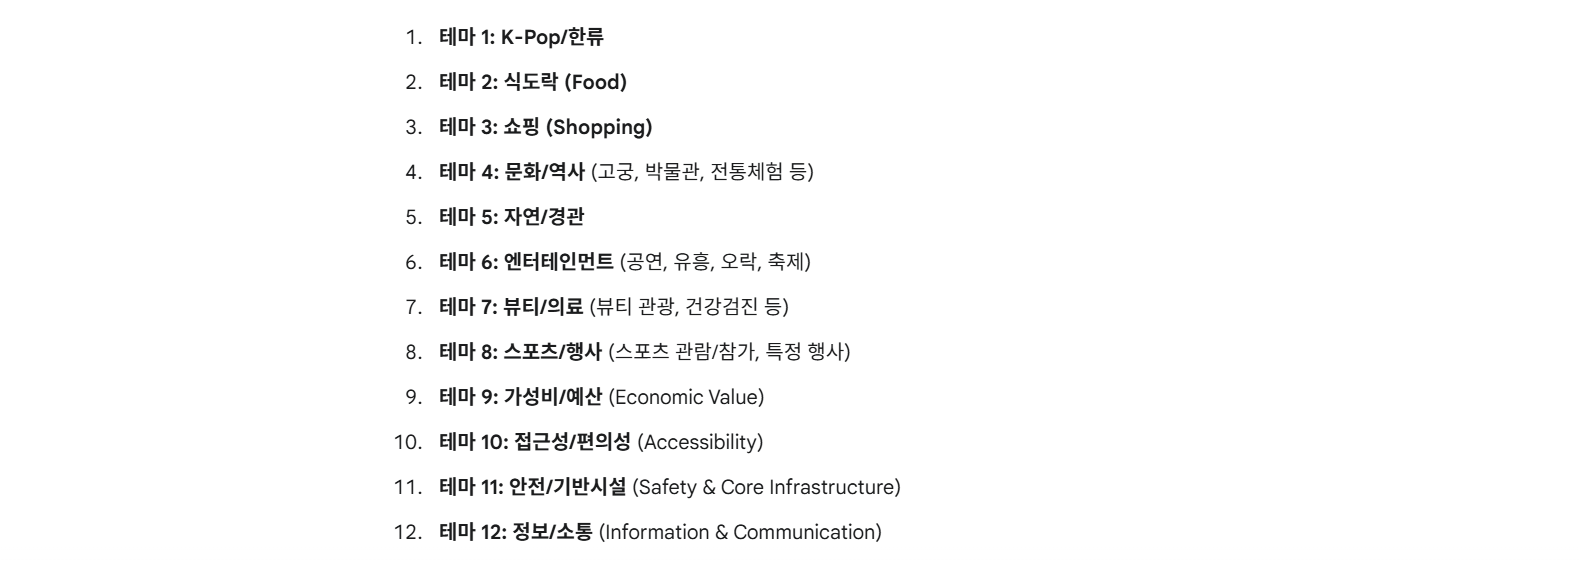

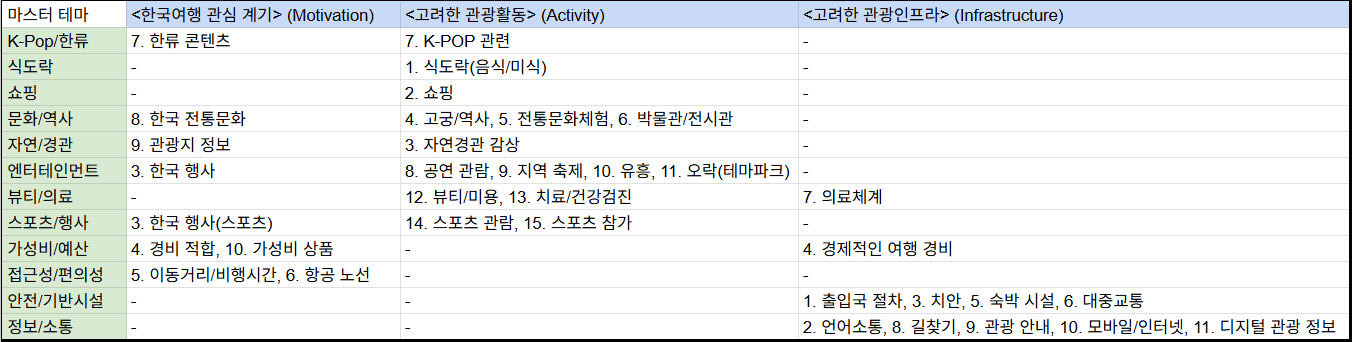

근데 우리 관광인프라 변수 왜 넣은거지? 항목보는데 뭔가 애매함... 그냥 관광객들이 여행올 때 뭘 중요하게 생각하는지 보기 위해서인가 싶기도 하고...

실험 1: 보류

실험 2: 테마점수 1순위만

실험 3: 테마점수 1-3순위

헐 잠만, '참여한 활동'이라는 변수들이 있는데? 고려한 관광활동을 이 변수 대신 쓰는게 맞나? 범주 내용은 비슷하긴한데 일대일대응은 아님

잠만 '만족한 활동'이라는 변수도 있어!!! 얘는 '참여한 활동'이랑 범주가 아예 똑같은 듯

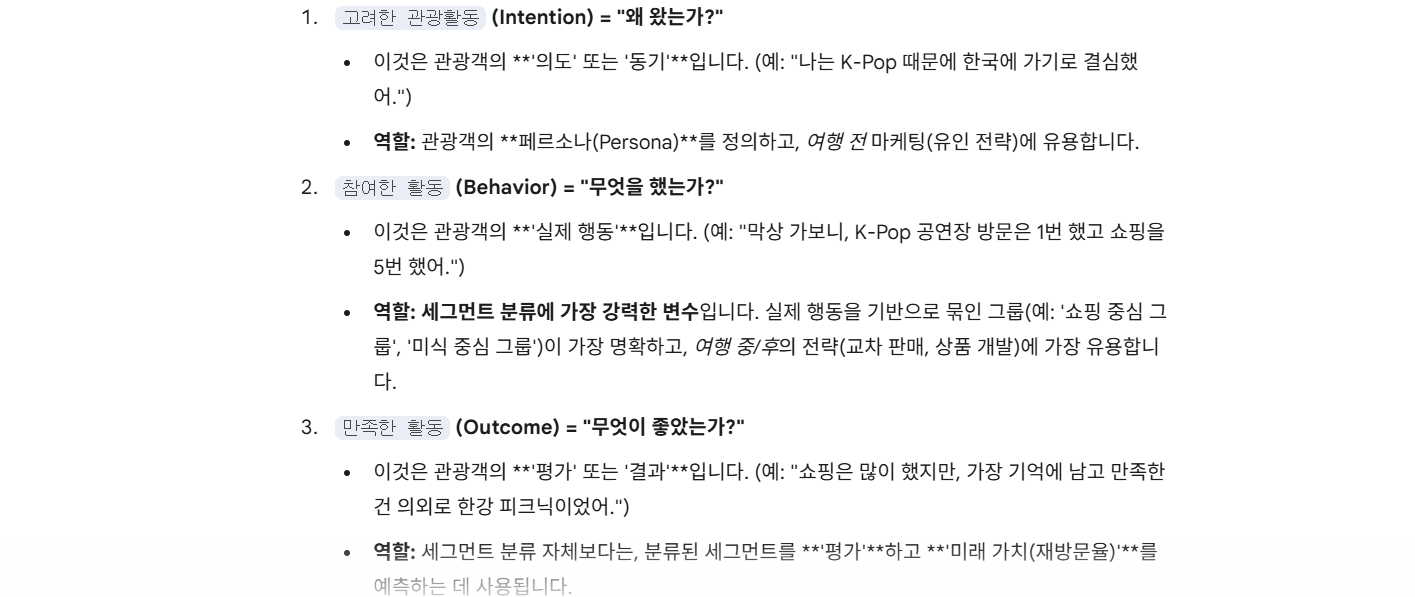

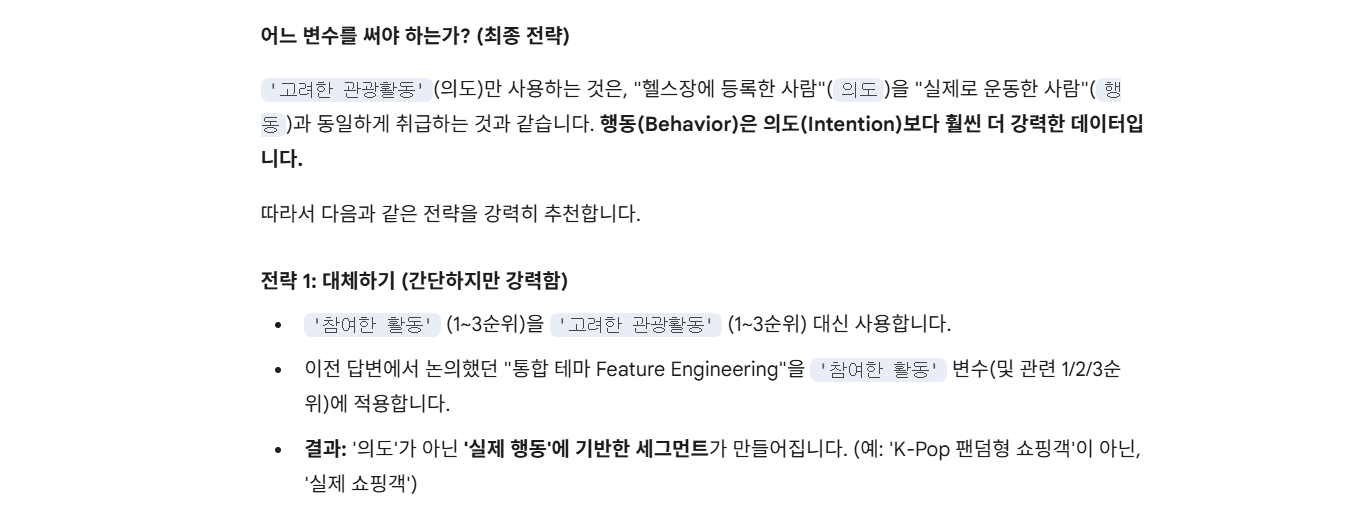

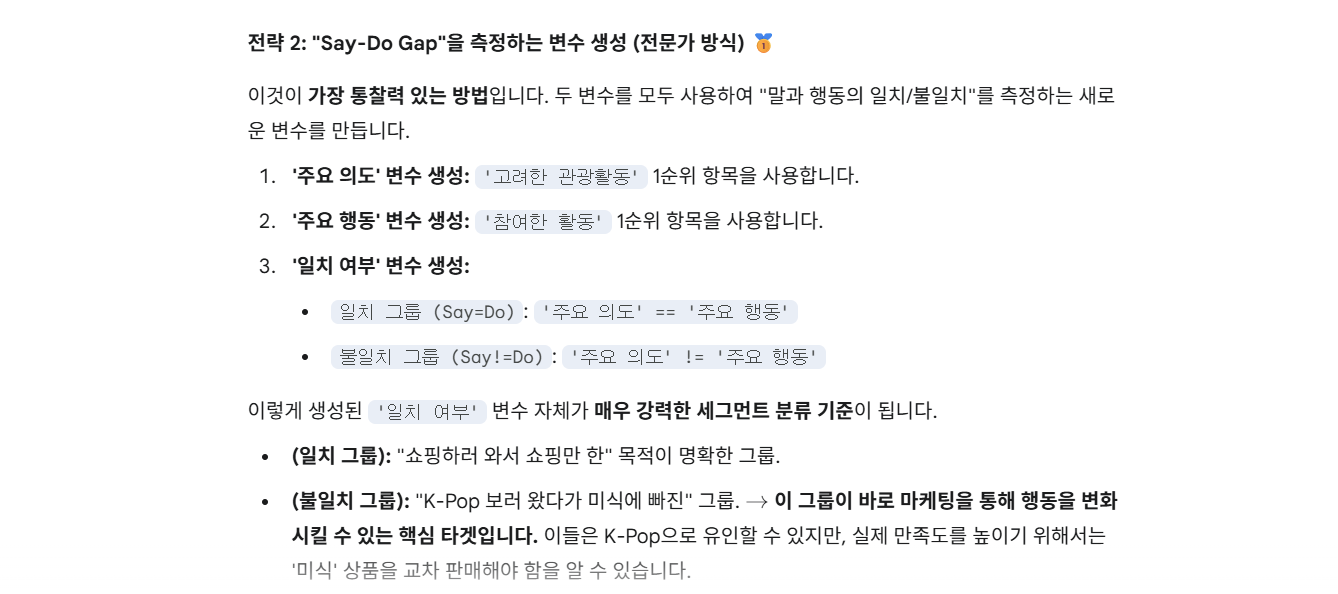

- 원래대로 '고려한 관광활동'

- 불일치 그룹만 따로 모아서 의도와 행동이 왜 다른지 EDA

# 국가별 EDA

In [20]:
df.columns

Index(['아이디', '국가별', '성별', '연령별', '문1. 주요 방한 목적', '한국 방문횟수(카테고리)',
       '문1-1. 한국여행 관심 계기_1순위', '문3-1. 고려한 관광활동_1순위', '문3-2. 고려한 관광인프라_1순위',
       '문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)',
       '문9-3. 총 체재기간_61일 이상 결측', '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '주요 체재 지역',
       '총 국내 지출경비', '총 식비_비율', '총 국내 교통비_비율', '총 체험/활동비_비율', '총 뷰티/의료비_비율',
       '총 여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율', '기타 비용_비율'],
      dtype='object')

In [39]:
raw = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/만족도조사.csv')

C:\Users\sopi0\AppData\Local\Temp\ipykernel_17848\1595711854.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/만족도조사.csv')


In [49]:
# 내가 궁금한 변수 전부 가져오기
cols = ['아이디',
'문7. 동반자 유무',
'문7. 여행 동반자(1. 혼자 방문)',
'문7. 여행 동반자(2. 배우자/파트너)',
'문7. 여행 동반자(3. 부모님)',
'문7. 여행 동반자(4. 자녀)',
'문7. 여행 동반자(5. 그 외 가족/친지)',
'문7. 여행 동반자(6. 친구)',
'문7. 여행 동반자(7. 직장 동료)',
'문7. 여행 동반자(8. 기타)',
'문7-1. 동반자 수(본인포함)',
'문7-1. 동반자 수(본인제외)',
'문7-1. 동반자 수(만 15세 미만)',
'문7-1. 동반자 수(본인포함, 만 15세 미만 제외)',
'문7-1. 동반자 수(본인제외, 만 15세 미만 제외)',
'문8. 참여한 활동(1. 식도락 관광)',
'문8. 참여한 활동(2. 쇼핑)',
'문8. 참여한 활동(3. 자연경관 감상)',
'문8. 참여한 활동(4. 고궁/역사 유적지 방문)',
'문8. 참여한 활동(5. 전통문화체험)',
'문8. 참여한 활동(6. 박물관, 전시관 관람)',
'문8. 참여한 활동(7. K-POP, 한류스타 관련 공연장 및 드라마/영화 촬영지 방문)',
'문8. 참여한 활동(8. 연극, 뮤지컬, 발레 등 공연 관람)',
'문8. 참여한 활동(9. 지역 축제 참여)',
'문8. 참여한 활동(10. 유흥)',
'문8. 참여한 활동(11. 오락)',
'문8. 참여한 활동(12. 뷰티/미용 관광)',
'문8. 참여한 활동(13. 치료/건강검진)',
'문8. 참여한 활동(14. 스포츠/레포츠 관람)',
'문8. 참여한 활동(15. 스포츠/레포츠 참가)',
'문8. 참여한 활동(16. 국제회의)',
'문8. 참여한 활동(17. 비즈니스 전문활동)',
'문8. 참여한 활동(18. 연수, 교육, 연구)',
'문8. 참여한 활동(19. 기타)',
'문8-1. 만족한 활동_1순위',
'문8-1. 만족한 활동_2순위',
'문8-1. 만족한 활동_3순위',
'문9-1. 가장 좋았던곳_1',
'문9-1. 가장 좋았던곳_2',
'문9-1. 가장 좋았던곳_3',
'문9-1. 가장 좋았던곳_4',
'문9-1. 가장 좋았던곳_5',
'문10-2. 쇼핑 항목(1. 향수, 화장품)',
'문10-2. 쇼핑 항목(2. 식료품)',
'문10-2. 쇼핑 항목(3. 의류)',
'문10-2. 쇼핑 항목(4. 신발류)',
'문10-2. 쇼핑 항목(5. 가방류)',
'문10-2. 쇼핑 항목(6. 보석/악세서리)',
'문10-2. 쇼핑 항목(7. 인삼, 한약재)',
'문10-2. 쇼핑 항목(8. 주류)',
'문10-2. 쇼핑 항목(9. 담배)',
'문10-2. 쇼핑 항목(10. 전통 민예품, 칠기, 목각제품)',
'문10-2. 쇼핑 항목(11. 한류 스타 관련상품)',
'문10-2. 쇼핑 항목(12. 전자제품)',
'문10-2. 쇼핑 항목(13. 기타)'
]

In [50]:
tmp = raw[cols]

In [51]:
alldf = pd.merge(left = df, right = tmp, how = 'inner', on='아이디')
alldf.head()

,아이디,국가별,성별,연령별,문1. 주요 방한 목적,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1순위,문3-1. 고려한 관광활동_1순위,문3-2. 고려한 관광인프라_1순위,"문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)",...,문10-2. 쇼핑 항목(4. 신발류),문10-2. 쇼핑 항목(5. 가방류),문10-2. 쇼핑 항목(6. 보석/악세서리),"문10-2. 쇼핑 항목(7. 인삼, 한약재)",문10-2. 쇼핑 항목(8. 주류),문10-2. 쇼핑 항목(9. 담배),"문10-2. 쇼핑 항목(10. 전통 민예품, 칠기, 목각제품)",문10-2. 쇼핑 항목(11. 한류 스타 관련상품),문10-2. 쇼핑 항목(12. 전자제품),문10-2. 쇼핑 항목(13. 기타)
0,6.0,3.0,2.0,2.0,1,4.0,2.0,1.0,6.0,40.49,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.0,5.0,2.0,4.0,1,1.0,8.0,5.0,5.0,228.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.0,8.0,2.0,3.0,1,1.0,4.0,12.0,1.0,204.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.0,8.0,1.0,5.0,1,1.0,1.0,5.0,4.0,219.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20.0,3.0,1.0,2.0,1,1.0,7.0,7.0,10.0,167.08,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN


In [52]:
alldf['국가별'].nunique()

21

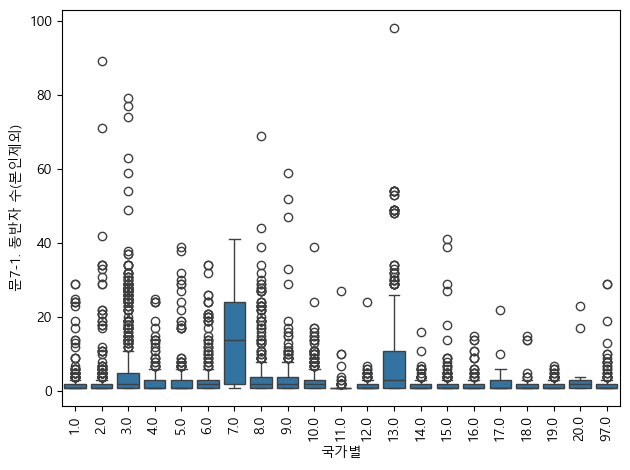

In [57]:
sns.boxplot(x='국가별',y='문7-1. 동반자 수(본인제외)',data=alldf)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

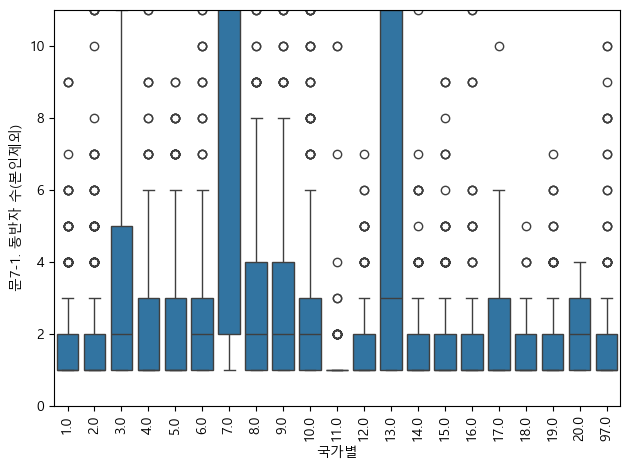

In [58]:
sns.boxplot(x='국가별',y='문7-1. 동반자 수(본인제외)',data=alldf)
plt.xticks(rotation=90)
plt.ylim(0,11)
plt.tight_layout()
plt.show()

7: 베트남, 13: 인도네시아 ==> 평균이 10명 이상(단체 관광객)

In [59]:
shopping = ['문10-2. 쇼핑 항목(1. 향수, 화장품)',
'문10-2. 쇼핑 항목(2. 식료품)',
'문10-2. 쇼핑 항목(3. 의류)',
'문10-2. 쇼핑 항목(4. 신발류)',
'문10-2. 쇼핑 항목(5. 가방류)',
'문10-2. 쇼핑 항목(6. 보석/악세서리)',
'문10-2. 쇼핑 항목(7. 인삼, 한약재)',
'문10-2. 쇼핑 항목(8. 주류)',
'문10-2. 쇼핑 항목(9. 담배)',
'문10-2. 쇼핑 항목(10. 전통 민예품, 칠기, 목각제품)',
'문10-2. 쇼핑 항목(11. 한류 스타 관련상품)',
'문10-2. 쇼핑 항목(12. 전자제품)',
'문10-2. 쇼핑 항목(13. 기타)']

In [ ]:
sns.heatmap()

In [ ]:
sns.barplot()